<h1>Online store: Video and on-line games analysis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div> 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-download-and-overview" data-toc-modified-id="Data-download-and-overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data download and overview</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Missing-Values-Treatment" data-toc-modified-id="Missing-Values-Treatment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing Values Treatment</a></span></li><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Transformation</a></span></li><li><span><a href="#Data-enrich" data-toc-modified-id="Data-enrich-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data enrich</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#How-many-games-were-released-in-different-years" data-toc-modified-id="How-many-games-were-released-in-different-years-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>How many games were released in different years</a></span></li><li><span><a href="#Platform-Sales-evolution" data-toc-modified-id="Platform-Sales-evolution-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Platform Sales evolution</a></span></li><li><span><a href="#Critic-score,-User-score-and-Correlation" data-toc-modified-id="Critic-score,-User-score-and-Correlation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Critic score, User score and Correlation</a></span></li><li><span><a href="#same-games-sales-comparison,-games-distribution-by-genre,-profitable-genres" data-toc-modified-id="same-games-sales-comparison,-games-distribution-by-genre,-profitable-genres-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>same games sales comparison, games distribution by genre, profitable genres</a></span></li></ul></li><li><span><a href="#User-Profile" data-toc-modified-id="User-Profile-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>User Profile</a></span><ul class="toc-item"><li><span><a href="#Top-platforms-Review" data-toc-modified-id="Top-platforms-Review-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Top platforms Review</a></span></li><li><span><a href="#Top-Genres-review" data-toc-modified-id="Top-Genres-review-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Top Genres review</a></span></li><li><span><a href="#ESRB-ratings" data-toc-modified-id="ESRB-ratings-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>ESRB ratings</a></span></li></ul></li><li><span><a href="#HYPOTHESES" data-toc-modified-id="HYPOTHESES-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>HYPOTHESES</a></span><ul class="toc-item"><li><span><a href="#Average-user-ratings-of-the-Xbox-One-and-PC-platforms-are-the-same:" data-toc-modified-id="Average-user-ratings-of-the-Xbox-One-and-PC-platforms-are-the-same:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Average user ratings of the Xbox One and PC platforms are the same:</a></span></li><li><span><a href="#Average-user-ratings-for-the-Action-and-Sports-genres-differ:" data-toc-modified-id="Average-user-ratings-for-the-Action-and-Sports-genres-differ:-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Average user ratings for the Action and Sports genres differ:</a></span></li></ul></li><li><span><a href="#Generlal-Conclusion-for-the-project-&quot;Online-Games-Sales&quot;" data-toc-modified-id="Generlal-Conclusion-for-the-project-&quot;Online-Games-Sales&quot;-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generlal Conclusion for the project "Online Games Sales"</a></span></li></ul></div>

<div class="alert alert-info"> <b> Project Description :</b> 
   
As part of the analysis for the online store "Ice," which specializes in selling video games globally, we have access to a comprehensive dataset encompassing user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical game sales data. The goal of this project is to uncover key patterns that contribute to a game's success. By doing so, we can identify potential high-performing titles and strategically plan effective advertising campaigns for the upcoming year.

Within the dataset, we encounter the ESRB abbreviation, representing the Entertainment Software Rating Board. This board evaluates a game's content and assigns age-specific ratings such as Teen or Mature. As we delve into the data, we will be working with historical records dating back to 2016. For the purpose of our analysis, we can envision ourselves in December 2016, strategizing campaigns for the following year, although the specific year is less important than gaining valuable experience in working with data to make informed business decisions.
</div>

<div class="alert alert-info"> <b> Data description :</b>   
    
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)
- Data for 2016 may be incomplete.
</div>

# Download Libraries

In [27]:
#installing sidetable to work with summury tables
!python -m pip install sidetable

In [28]:
# Loading all the libraries

# for data preprocessing:
import pandas as pd
import numpy as np
import sidetable as stb

# for data analysis:
import math as mt
from math import factorial
from scipy import stats as st
from scipy.stats import norm

# for statistical data visualization
import seaborn as sns
from matplotlib import pyplot as plt

# for date and time transformation
from datetime import datetime

#override system error
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

print('Required libraries has been loaded')


Required libraries has been loaded


## Data download and overview

In [29]:
# creating custom function for datadownload and exploration

def explore_dataset(file_path):
    # Load the data file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Display basic information about the dataset
    print("Dataset info:")
    print(df.info())
    
    # Display the first few rows
    print("\nFirst few rows:")
    print(df.head())
    
    # Display the last few rows
    print("\nLast few rows:")
    print(df.tail())
    
    # Display the shape of the dataset
    print("\nShape of the dataset:", df.shape)
    
    # Display summary statistics
    print("\nSummary statistics:")
    print(df.describe(include='object').T)                   
    
    # Display number of duplicates
    duplicates = df.duplicated().sum()
    print("\nNumber of duplicates:", duplicates)
    
    # Display percentage of missing data using sidetable
    missing_data = df.isna().sum()
    print("\nNumber of missing data:")
    print(missing_data)
    
    # Display value counts for categorical columns
    print("\nValue counts for categorical columns:")
    for column in df.select_dtypes(include='object'):
        print(df[column].value_counts())
    
    # Perform additional exploratory analysis as needed
    
    return df

In [30]:
# Calling function to read and explore the dataset

file_path = '/datasets/games.csv'  
df = explore_dataset(file_path)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

First few rows:
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES       

<div class="alert alert-info"> <b> First Observations of the Data :</b>  
    
**Dataset Info:**
- The dataset contains 16715 entries and 11 columns.
- Columns include 'Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', and 'Rating'.
- The data types in the columns include float64 and object (string).
- There are missing values in the columns 'Year_of_Release', 'Critic_Score', 'User_Score', and 'Rating'.

**Summary Statistics:**
- The average year of release is approximately 2006, with a standard deviation of around 5.88.
- The sales data columns ('NA_sales', 'EU_sales', 'JP_sales', 'Other_sales') have varying mean values and standard deviations, indicating differing sales distribution across regions.
- The average critic score is approximately 69, with a standard deviation of around 13.94.
- The user score data seems to be stored as an object (string) datatype, which may require further investigation.

**Number of Duplicates:**
- There are no duplicate entries in the dataset.

Overall, the dataset contains information about video game releases, including their names, platforms, release years, genres, sales figures in different regions, critic scores, user scores, and ratings. The dataset requires further exploration and cleaning to handle missing values, datatype conversions, and potentially incorrect data.
</div>

## Data Preprocessing

In [31]:
#converting datatype for 'Year_of_Release' column
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')

In [32]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
#calculating % of missing data
df.stb.missing(clip_0=True, style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%


In [8]:
df.stb.freq(['Name', 'Platform', 'Year_of_Release', 'Genre'],thresh=20, other_label='Rest of Games')

,Name,Platform,Year_of_Release,Genre,count,percent,cumulative_count,cumulative_percent
0,Madden NFL 13,PS3,2012.0,Sports,2,0.012162,2,0.012162
1,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,1,0.006081,3,0.018244
2,uDraw Studio: Instant Artist,X360,2011.0,Misc,1,0.006081,4,0.024325
3,uDraw Studio: Instant Artist,Wii,2011.0,Misc,1,0.006081,5,0.030406
4,uDraw Studio,Wii,2010.0,Misc,1,0.006081,6,0.036487
...,...,...,...,...,...,...,...,...
3283,Sudokuro,DS,2007.0,Puzzle,1,0.006081,3285,19.976891
3284,Sudoku Mania,DS,2006.0,Puzzle,1,0.006081,3286,19.982973
3285,Sudoku Gridmaster (JP sales),DS,2006.0,Puzzle,1,0.006081,3287,19.989054
3286,Sudoku Gridmaster,DS,2006.0,Puzzle,1,0.006081,3288,19.995135


In [9]:
df.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

<div class="alert alert-info"> <b> Data Exproration :</b>  

The DataFrame has been successfully loaded and meticulously examined for the presence of both duplicated and missing data. Although no duplicate records were identified, missing values were found in several columns. Notably, three columns exhibit a substantial proportion of missing data, accounting for over 40-50% of the respective entries, while a few other columns have only a minor percentage of missing data.

During the initial analysis, it became apparent that certain data types need to be adjusted to their appropriate formats. The analysis also revealed intriguing insights: the most frequently mentioned game title is "Need for Speed," appearing a total of 12 times. The leading platform is PlayStation 2, with "Action" being the most common genre and an "E" ("Everybody") rating being prevalent.

Interestingly, the user score "TBD" (to be determined) emerges as a significant feature. Additionally, the "Year of Release" column spans from 1980 to 2016, with a mean of 2006.5 and a median of 2007. The relatively close mean and median values suggest the potential use of either value to address missing release year data.

Furthermore, these insights also apply to the "Critic Score" column, which exhibits missing values exceeding 50%.

Data preprocessing and enrichment steps will be crucial in addressing these observations and enhancing the dataset's overall quality.
</div>

### Missing Values Treatment

missing data is an important step in data analysis. We should consider the following approachs of possible filling missing values observed in our dataset, keeping in mind, that the decision on how to handle missing data depends on the missing data nature and it's potential impact on analysis and recommendations:

1. **Critic_Score, User_Score, Rating:**
   These columns are related to the critical and user ratings of the games. It's possible that if these values are missing, the games might not have received reviews or ratings. We could consider filling these missing values with a placeholder value like mean or 0 to indicate missing ratings. Alternatively, we might choose to drop rows with missing values in these columns. However, since Critic_Score is missing over 50% and User_Score, Rating are missing over 40%, by removing such significant part of data we have high risk to loose key information, which is important for our analysis.

2. **Year_of_Release:**
   This column represents the year the game was released. We might consider filling missing values using a strategy like median imputation, where you replace missing values with the median of the non-missing values in this column. Another option is forward-fill or backward-fill imputation, where we can use the nearest non-missing value to fill the missing value. 

3. **Name, Genre:**
   These columns represent the name and genre of the game. Filling missing values for these columns can be challenging since they are text data. It's usually not advisable to impute text data directly. If these values are missing, we might not be able to accurately determine the name or genre of the game. It might be best to drop rows with missing values in these columns, as their missing % is less than 1%.

In [33]:
# Convert 'User_Score' to numeric 
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Group by 'Platform' and 'Year_of_Release', calculate mean scores
grouped_scores = df.groupby(['Platform', 'Year_of_Release'])[['Critic_Score', 'User_Score']].mean()

# Function to fill missing scores using the grouped mean
def fill_scores(row):
    platform = row['Platform']
    year = row['Year_of_Release']
    
    if pd.isnull(row['Critic_Score']):
        if (platform, year) in grouped_scores.index:
            row['Critic_Score'] = grouped_scores.loc[(platform, year), 'Critic_Score']
    if pd.isnull(row['User_Score']):
        if (platform, year) in grouped_scores.index:
            row['User_Score'] = grouped_scores.loc[(platform, year), 'User_Score']
    return row

# Apply the function to fill missing scores
df = df.apply(fill_scores, axis=1)

In [34]:
# Fill remaining missing values in Critic_Score and User_Score with a placeholder value
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)
df['User_Score'].fillna(df['User_Score'].mean(), inplace=True)

**Rating (ESRB) Breakdown**:

- Rating Pending (RP)
- Everyone (E)
- Everyone 10+ (E10+)
- Teen (T)
- Mature 17+ (M)
- Adults Only 18+ (AO)

In [35]:
#viewing Rating column to see the general information about it
df.stb.freq(['Rating'], style=True)

,Rating,count,percent,cumulative_count,cumulative_percent
0,E,"3,990",40.10%,"3,990",40.10%
1,T,"2,961",29.76%,"6,951",69.87%
2,M,"1,563",15.71%,"8,514",85.58%
3,E10+,"1,420",14.27%,"9,934",99.85%
4,EC,8,0.08%,"9,942",99.93%
5,RP,3,0.03%,"9,945",99.96%
6,K-A,3,0.03%,"9,948",99.99%
7,AO,1,0.01%,"9,949",100.00%


In [36]:
# this function counts the occurrences of each rating for each game, iterates over the rows, looks up the mean occurrences 
# for the corresponding game, and fills the missing value with the most common rating for that game

def fill_missing_ratings(df):
    # Fill missing 'Rating' values with the most common rating in the entire dataset
    most_common_rating = df['Rating'].mode().iloc[0]
    df['Rating'].fillna(most_common_rating, inplace=True)
    
    # Count occurrences of E, T, M, E10+ ratings based on 'Name' and 'Genre'
    common_ratings = ['E', 'T', 'M', 'E10+']
    for rating in common_ratings:
        rating_counts = df[df['Rating'] == rating].groupby(['Name', 'Genre']).size()
        for index, count in rating_counts.items():
            name, genre = index
            df.loc[(df['Name'] == name) & (df['Genre'] == genre), 'Rating'] = rating
    
    return df

# Fill missing ratings
df = fill_missing_ratings(df)

In [37]:
#checking column 'name' for missing values
df['Name'].isna().sum()

2

In [38]:
#filtering missing values in column 'name'
df[df['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,69.03077,7.178329,E
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,69.03077,7.178329,E


In [39]:
#checking number of geners popular on platform GEN in 1993
df.query('platform =="GEN"' and 'Year_of_Release == 1993').groupby(['Genre', 'Year_of_Release'])['Platform'].count()

Genre         Year_of_Release
Action        1993                6
Adventure     1993                1
Fighting      1993               11
Misc          1993                3
Platform      1993               11
Puzzle        1993                3
Racing        1993                2
Role-Playing  1993                9
Shooter       1993                2
Simulation    1993                1
Sports        1993                9
Strategy      1993                2
Name: Platform, dtype: int64

In [40]:
#checking column 'genre' for missing values
df['Genre'].isna().sum()

2

In [41]:
#filtering missing values in column 'name'
df[df['Genre'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,69.03077,7.178329,E
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,69.03077,7.178329,E


In [42]:
# Drop rows with missing values in 'Name' and 'Genre' columns
df.dropna(subset=['Name', 'Genre'], inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Display the shape of the DataFrame after dropping rows
print("Shape of the DataFrame after dropping rows with missing 'Name' or 'Genre':")
print(df.shape)

Shape of the DataFrame after dropping rows with missing 'Name' or 'Genre':
(16713, 11)


In [43]:
#checking column 'Year_of_Release' for missing values
yor_freq = df.stb.freq(['Year_of_Release'], style=True)  
print(yor_freq)
print('-------------------------------------------------')

#filtering missing values in column 'Year_of_Release'
total_missings = df['Year_of_Release'].isna().sum()         
print('Year_of_Release is missing:', total_missings)
print('-------------------------------------------------')

#filtering missing values in column 'Year_of_Release'
df[df['Year_of_Release'].isnull()]                   

#Using the isnull() and groupby() methods to count missing game on the platforms
df[df['Year_of_Release'].isnull()].groupby('Platform')['Name'].count().sort_values(ascending=False)

-------------------------------------------------
Year_of_Release is missing: 269
-------------------------------------------------


Platform
PS2     34
Wii     34
DS      30
X360    30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: Name, dtype: int64

In [44]:
# filling missing records
df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], errors='coerce')
df['Year_of_Release'] = df.groupby(['Platform'])['Year_of_Release'].transform('mean')

In [45]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
NA_sales           0
EU_sales           0
JP_sales           0
Other_sales        0
Critic_Score       0
User_Score         0
Rating             0
dtype: int64

### Data Transformation

In [46]:
#renaming columns and changing to lowercase
df.columns = ['name', 'platform', 'release_year', 'genre', 'sales_na', 'sales_eu', 'sales_jp', 'sales_other', 'critic_score', 'user_score', 'rating']

In [47]:
# viewing data sample
df.sample()

,name,platform,release_year,genre,sales_na,sales_eu,sales_jp,sales_other,critic_score,user_score,rating
13822,Motto TOEIC Test DS Training,DS,2008.18529,Misc,0.0,0.0,0.04,0.0,64.222826,7.095041,E


In [48]:
#verifying datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   release_year  16713 non-null  float64
 3   genre         16713 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  16713 non-null  float64
 9   user_score    16713 non-null  float64
 10  rating        16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [49]:
#changing datatype
df['release_year']=df['release_year'].astype('int64')

### Data enrich

In [51]:
# Calculation of total sales (worldwide)
df['global_sales'] = df[['sales_na', 'sales_eu', 'sales_jp', 'sales_other']].sum(axis=1)
display(df.head())

,name,platform,release_year,genre,sales_na,sales_eu,sales_jp,sales_other,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2008,Sports,41.36,28.96,3.77,8.45,76.00000,8.000000,E,82.54
1,Super Mario Bros.,NES,1987,Platform,29.08,3.58,6.81,0.77,69.03077,7.178329,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2008,Sports,15.61,10.93,3.28,2.95,80.00000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1995,Role-Playing,11.27,8.89,10.22,1.00,69.03077,7.178329,E,31.38


<div class="alert alert-info"> <b> Data Transformation and Missing Values Treatment :</b>
    
Since some columns have a significant portion of missing values, ranging from 40% to over 50%, while other columns exhibit minor percentages of missing data, we had to inspect the general information, to correct data types and to treat missing values filling them with meanigfull information.

Critic_Score, User_Score, Rating: These columns are linked to critical and user ratings for the games. The absence of these values could indicate that certain games didn't receive reviews or ratings. Filling these missing values with placeholder values like mean or 0 is an option, but the high proportion of missing data (over 40-50%) suggests that removing such a substantial portion of data might lead to the loss of valuable insights crucial for our analysis.

Year_of_Release: This column represents the release year of games. A strategy like median imputation, where missing values are replaced with the median of non-missing values, could be employed to address this. Alternatively, forward-fill or backward-fill imputation could be used to substitute missing values with the nearest non-missing values.

Name, Genre: These columns relate to the name and genre of the game. Imputing missing text data directly is challenging. Since the missing percentages are very low (less than 1%), it might be reasonable to drop rows with missing values in these columns.

Upon further investigation, two rows with missing values were found in the 'Name' column. These games were traced using the 'Genre', 'Year_of_Release', and 'Platform' columns. Although the release year and platform could be identified, determining the exact game name is not feasible. Consequently, these rows were dropped, though, alternativelly, they caould be filled with labels like "unidentified" or "unknown". Similarly, missing values in the 'Genre' column align with the rows previously identified in the 'Name' column. In this case as well, the choice is between dropping these rows or renaming the NaN values.

For 'Year_of_Release', 269 rows have missing release years, constituting less than 2% of the data. Given the valuable information these rows provide, they were retained and missing values were filled based on the mean year for each platform.

The ESRB rating system was established in September 1994, meaning games released before 1994 should not have ESRB ratings. Some outdated categories like K-A and EC were present. K-A ratings were renamed to E10+; hence, we can replace K-A with E10+. EC, meant for children aged 3 and older, can be changed to E (Everybody). For the substantial missing data in the 'Rating' column, due to the vast variety of games and platforms, these NaN values were set to "unidentified".

In summary, data preprocessing and missing value treatment were effectively carried out, datatypes have been changed, added columns. We prepared our clean dataset for further analysis.
</div>

## EDA

### How many games were released in different years

In [52]:
#Looking at how many games have been released in different years
diff_years_games = (df[['release_year', 'name']].groupby('release_year').count().sort_values(by='name', ascending=False)
    .reset_index()
)
diff_years_games.columns = ['release_year', 'number_of_games']
diff_years_games.head(10)


,release_year,number_of_games
0,2008,5654
1,2003,2202
2,2004,2161
3,1998,1516
4,2010,1331
5,2009,1262
6,2014,677
7,2013,667
8,2015,392
9,1993,272


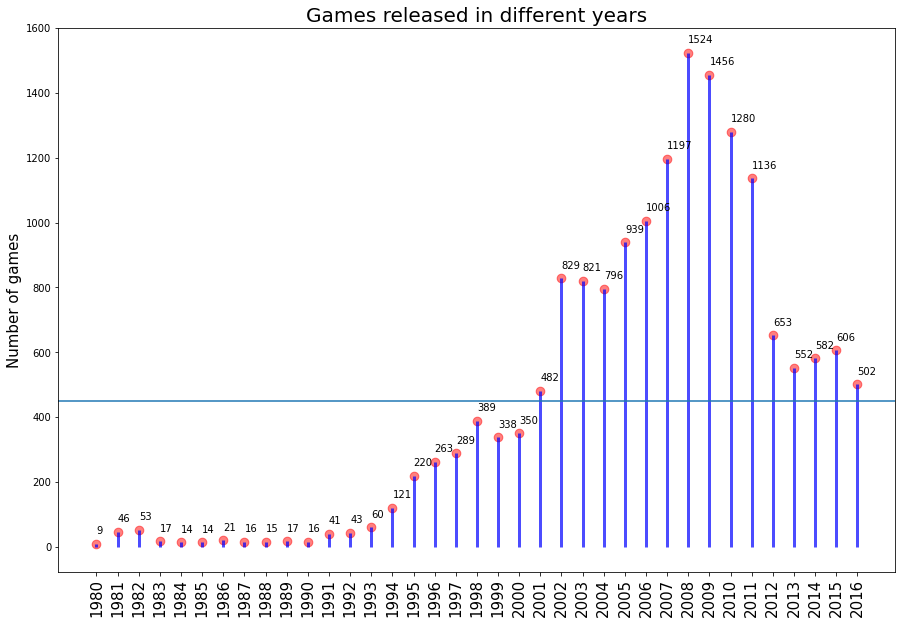

In [73]:
#building the lollipop plot to visualize the number of games release in each year (Credit to tutor Anastasiya Piterskaya)
fig, ax = plt.subplots(figsize=(15,10))
ax.vlines(x = diff_years_games['release_year'], ymin = 0, 
          ymax = diff_years_games['number_of_games'], color='blue', alpha = 0.7, linewidth = 3)

ax.scatter(x = diff_years_games['release_year'], y = diff_years_games['number_of_games'],
           s=75, color='red', alpha=0.5)

ax.set_title("Games released in different years", fontdict={'size':20})
ax.set_ylabel("Number of games", fontdict={'size':15})
ax.set_xticks(diff_years_games['release_year'])
ax.set_xticklabels(diff_years_games['release_year'], rotation=90, fontdict={'size':15})
ax.axhline(y=450)

for row in diff_years_games.itertuples():
    ax.text(row.release_year, row.number_of_games+30, s=row.number_of_games)
plt.show()


<div class="alert alert-info"> <b> Observation of games release in different years:</b>
    
The lollipop graph illustrates the data's normal distribution, starting from the year 2000. Prior to 2000, platforms had fewer than 400 game releases annually. This trend changed in 2000, potentially due to technological advancements leading to improved game quality. The number of games doubled by 2002 and continued to rise, peaking in 2008-2009. Post-2012, the annual game releases remained under 700. The peak year was 2008 with 1524 releases.

Anticipating the impact of emerging technologies like VR and neurogaming, we expect the gaming market to be reshaped and sales to surge again. This highlights the significance of keeping an eye on evolving online gaming tech to anticipate a new gaming era.

Comparing the prosperous years of 2008-2010 with the decline of 2014-2016, we can uncover reasons behind the decrease and identify which games/platforms endured over time. This period serves as a pivotal data range for analysis and future predictions.    
</div>    

### Platform Sales evolution

**Calculating z-score, which represent a statistical measurement that describes a value's relationship to the mean of a group of values. It is possible to find it by formula (x-mu/sigma), where: X is a data value, Mu is the population mean and Sigma is the population standard deviation (std).**

In [53]:
#Looking at how sales varied from platform to platform
glob_platforms = (df[['platform', 'global_sales']].groupby('platform').sum().sort_values(
    by='global_sales', ascending=False).reset_index())
glob_platforms.columns = ['platforms', 'global_sales']
glob_platforms.head(10)

,platforms,global_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [54]:
# calculating z-score for sales distribution
glob_platforms['z_sales'] = (
    glob_platforms['global_sales'] - glob_platforms['global_sales'].mean()) / glob_platforms['global_sales'].std()
glob_platforms.head(10)

,platforms,global_sales,z_sales
0,PS2,1255.77,2.780554
1,X360,971.42,1.963972
2,PS3,939.65,1.872737
3,Wii,907.51,1.780439
4,DS,806.12,1.489273
5,PS,730.86,1.273145
6,GBA,317.85,0.087084
7,PS4,314.14,0.076430
8,PSP,294.05,0.018737
9,PC,259.52,-0.080425


In [55]:
#parameters for standard diviation color
glob_platforms['color'] = ['grey' if x<0 else 'purple' for x in glob_platforms['z_sales']]
glob_platforms.head()

,platforms,global_sales,z_sales,color
0,PS2,1255.77,2.780554,purple
1,X360,971.42,1.963972,purple
2,PS3,939.65,1.872737,purple
3,Wii,907.51,1.780439,purple
4,DS,806.12,1.489273,purple


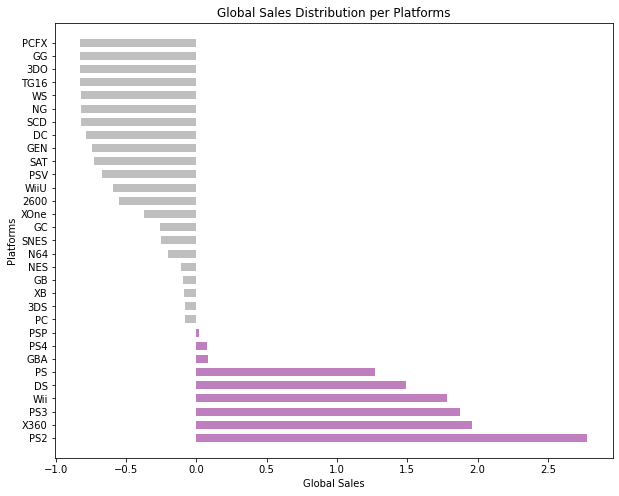

In [56]:
# Build a sales distribution per platforms
plt.figure(figsize=(10, 8))
plt.hlines(y=glob_platforms.platforms, xmin=0, xmax=glob_platforms['z_sales'], 
           color=glob_platforms.color, alpha=0.5, linewidth=8)
plt.title("Global Sales Distribution per Platforms")
plt.xlabel('Global Sales')
plt.ylabel('Platforms')
plt.show()

<div class="alert alert-info"> <b> Graph Observation: </b>
    
Z-score is a statistical measure used to understand how far a particular data point is from the mean of a dataset, measured in terms of standard deviations. A positive z-score indicates that the data point is above the mean, while a negative z-score indicates that the data point is below the mean.
    
In the context of the above graph, a higher positive z-score for a platform indicates that its global sales are significantly above the mean global sales. This suggests that those platforms are performing well and have a strong market presence, as you mentioned with platforms like PS2, X360, PS3, Wii, DS, and PS.
    
Analyzing sales on different platforms, we conclude, that the most successful platforms succeeded in on-line sales are the following: "PS2","X360","PS3","Wii","DS", "PS". PS2 made the best global sales, over 1,233BN, right after it goes X360 with 971M, PS3 939M, Wii 907M , DS 806, PS 730M.
    
5 top platforms are: PS2, DS, PS3, Wii, and X360 with the clear-cut leader PS2 gained 13% of the released games, DS - 13%. PS3 and Wii platforms with around 8% of all games.
    
PS platform peak in sales was in the last century, while Wii platform is the youngest among them, with peak sails in 2008. This sets PS2 in the middle, it’s sails peak was back in 2005. </div>    

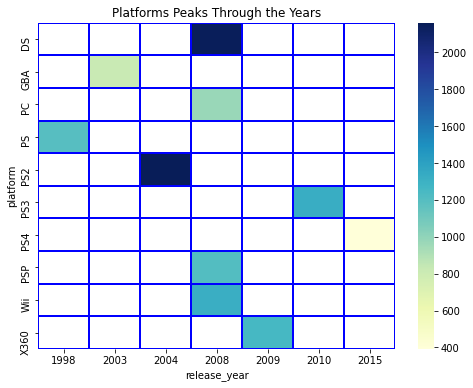

In [71]:
# Using pivot_table to create a DataFrame suitable for heatmap
diff_year_platform = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'])].pivot_table(
    index='platform', columns='release_year', values='name', aggfunc='count')

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(diff_year_platform, cmap='YlGnBu', linewidths=1, linecolor='blue')
plt.title('Platforms Peaks Through the Years')
plt.show()

In [75]:
# finding revenue of the leading platforms 
platforms = df.query('platform == ("PS2","X360","PS3","Wii","DS", "PS", "GBA", "PS4")')
platforms = platforms.groupby(['platform', 'release_year']).agg({'global_sales':'sum'}).reset_index()
platforms.head()

,platform,release_year,global_sales
0,DS,2008,806.12
1,GBA,2003,317.85
2,PS,1998,730.86
3,PS2,2004,1255.77
4,PS3,2010,939.65


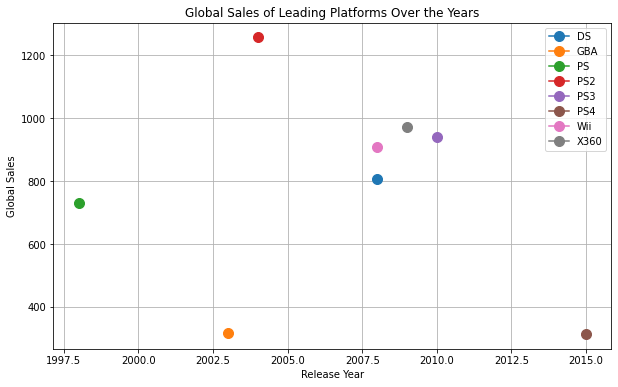

In [78]:
# Creating a line plot
plt.figure(figsize=(10, 6))

for platform in platforms['platform'].unique():
    platform_data = platforms[platforms['platform'] == platform]
    plt.plot(platform_data['release_year'], platform_data['global_sales'], marker='o', markersize=10, label=platform)

plt.title('Global Sales of Leading Platforms Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Global Sales')
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-info"> <b> Observations of Platforms life cycle, peaks and decline </b>   
    
Looking at the heatmap, we notice pairs of competing platforms like PSP - DS - X360, all launched around 2004-2005. X360 remains active, while PSP and DS faded after about 9 years. DS had peak popularity in 2007-2009, though it generated less revenue than older PS2 or X360.

Another comparison is PS2 and GBA, both debuted in 2000. GBA trailed PS2 in popularity and revenue. PS2 dominated global sales, existing until 2011, outlasting GBA, which ceased in 2007.

Typically, platforms remain appealing for 7 to 10 years before new successors or evolving technologies shift trends. One standout, the enduring PC, has shown steady progress since 2000. Platforms can have decades-long appeal or compete, like X360 and PS3, similar on many fronts, causing confusion among consumers during their simultaneous launches.
</div>

In [81]:
#selecting yaer of release before 2000
p_lifetime = df.query('release_year >= 2000')

In [82]:
#calculating lifetime of each platform and it's popularity
p_lifetime = p_lifetime.groupby(['platform'])['release_year'].agg(['min', 'max']).reset_index()
p_lifetime['age'] = p_lifetime['max'] - p_lifetime['min']
p_lifetime['age'].mean()

6.7

In [83]:
p_lifetime.sort_values(by='age', ascending=False)

,platform,min,max,age
7,PC,2000,2016,16
12,PSP,2004,2015,11
17,X360,2005,2016,11
9,PS2,2000,2011,11
10,PS3,2006,2016,10
15,Wii,2006,2016,10
2,DS,2004,2013,9
18,XB,2000,2008,8
1,DC,2000,2008,8
4,GBA,2000,2007,7


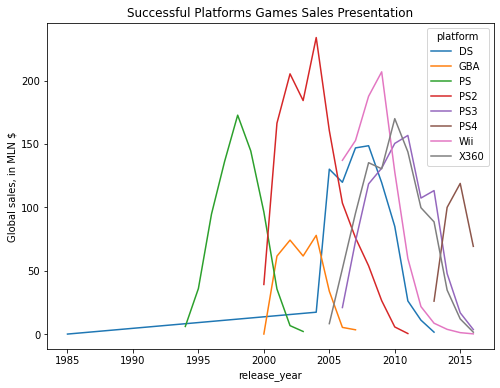

In [84]:
# distribution chart (no limitation on year of release) 
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=platforms, x='release_year', y='global_sales', hue='platform').set(
    title='Successful Platforms Games Sales Presentation', ylabel="Global sales, in MLN $")
plt.show()


In [85]:
# setting the limit for year of release, 2014
sales = df[df['release_year']>=2014]

Text(0.5, 1.0, '2014 - 2016 – Platforms Leading in Sales')

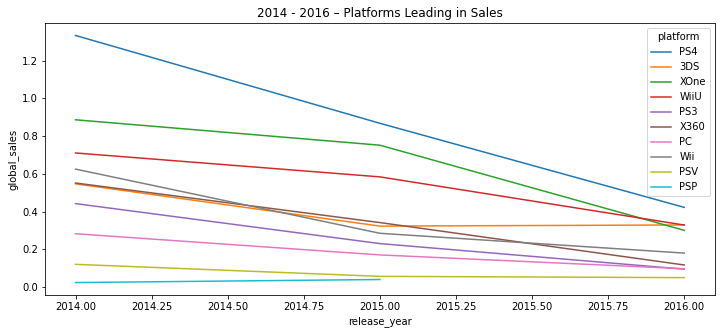

In [87]:
#creating a lineplot 
#(sns.move_legend is used correctly but still returns error message)
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=sales,x='release_year',y='global_sales',hue='platform', ci=None)
ax.set_title('2014 - 2016 – Platforms Leading in Sales')
#sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3,prop={'size': 1})

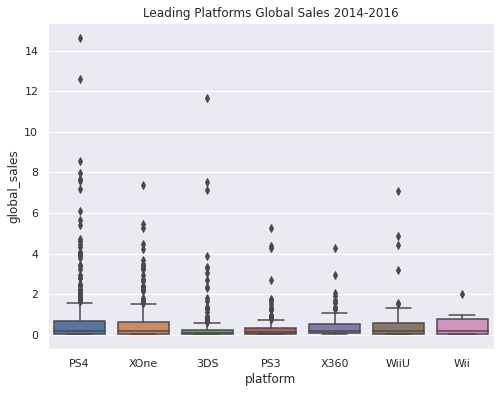

In [88]:
#Comperative boxpolt to visualize leading platforms profitability 2014-2016
gs_bxpt = sales.query('platform == ("WiiU","X360","PS3","Wii","3DS", "XOne", "PS4")')
gs_bxpt = gs_bxpt.groupby(['platform', 'name'])['global_sales'].sum().reset_index()

order = gs_bxpt.groupby(['platform'])['global_sales'].sum().reset_index().sort_values(
    by='global_sales', ascending=False)['platform']

sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='platform',y='global_sales',data= gs_bxpt, order=order)
plt.title('Leading Platforms Global Sales 2014-2016')
plt.show()

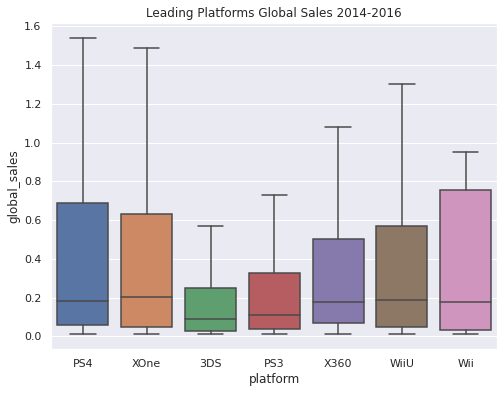

In [89]:
#Comperative boxpolt to visualize leading platforms profitability 2014-2016 without outlier 
gs_bxpt = sales.query('platform == ("WiiU","X360","PS3","Wii","3DS", "XOne", "PS4")')
gs_bxpt = gs_bxpt.groupby(['platform', 'name'])['global_sales'].sum().reset_index()

order = gs_bxpt.groupby(['platform'])['global_sales'].sum().reset_index().sort_values(
    by='global_sales', ascending=False)['platform']

sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='platform',y='global_sales',data= gs_bxpt, order=order, showfliers = False)
plt.title('Leading Platforms Global Sales 2014-2016')
plt.show()

<div class="alert alert-info"> <b> Popularity and Profit Over Time</b>
    
Comparing lineplots and boxplots, with one considering limited years and the other spanning the entire dataset, reveals consistent dynamics: platforms tend to become unprofitable after 5 to 10 years of existence. Although some platforms like PS2, PS, Wii, or X360 managed to remain profitable, a focused analysis from 2014 to 2016 indicates a general slowdown and decline in revenue for all platforms surviving until that period. Notably, PS and PSV have shown steady profits in recent years, while PSP's profitability has declined since 2015.

We further analyzed boxplots, both with and without outliers, to understand best-selling game patterns across platforms. The leading platforms—PS4, XOne, WiiU, X360, and Wii—exhibit similar median levels, suggesting comparable performance. However, PS4's data displays higher dispersion and more outliers, indicating a wider range of performance. These observations highlight an asymmetric, left-skewed data distribution.

Today's online gaming market is saturated with numerous platforms and games, potentially leading to player saturation. The period from 2000 to 2006 witnessed the emergence of many platforms that offered similar game experiences, benefiting from advancing technologies. This scenario mirrors the shift from traditional gaming to mobile applications triggered by the rise of smartphones, suggesting the possibility of another transformative phase in the gaming industry's evolution. 
</div> 

### Critic score, User score and Correlation

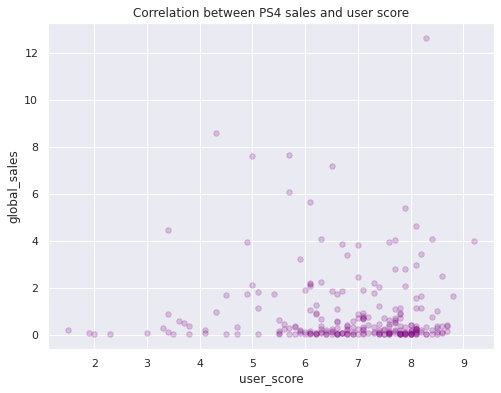

In [90]:
#scatterplot correlation user score and games sold on PS4 platform
values =["PS4"]
link = sales[sales['platform'].isin(values)]
link. plot.scatter(y='global_sales', x='user_score', alpha=0.2, c='purple',s=30)
plt.title('Correlation between PS4 sales and user score')
plt.show()

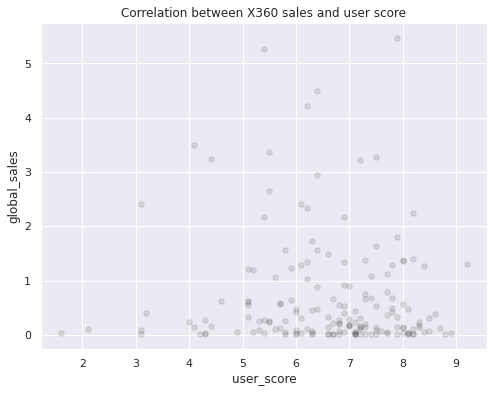

In [91]:
#scatterplot correlation user score and games sold on X360 platform
values =["XOne"]
link = sales[sales['platform'].isin(values)]
link. plot.scatter(y='global_sales', x='user_score', alpha=0.1, c='black',s=30)
plt.title('Correlation between X360 sales and user score')
plt.show()

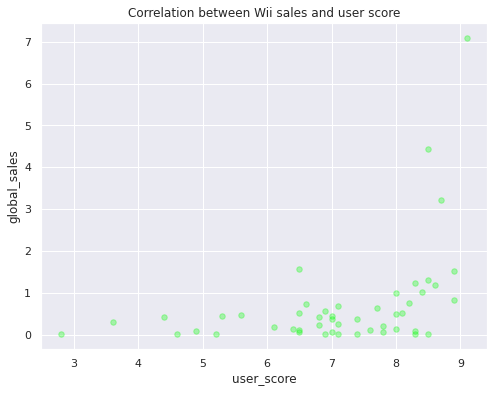

In [92]:
#scatterplot correlation user score and games sold on Wii platform
values =["WiiU"]
link = sales[sales['platform'].isin(values)]
link. plot.scatter(y='global_sales', x='user_score', alpha=0.3, c='lime',s=30)
plt.title('Correlation between Wii sales and user score')
plt.show()

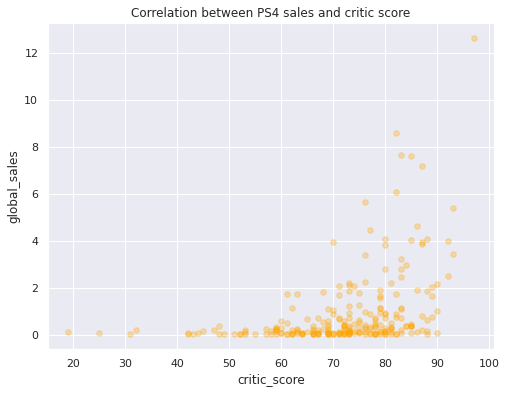

In [93]:
#scatterplot: correlation between critic score and games sold on PS4 platform
values =["PS4"]
link = sales[sales['platform'].isin(values)]
link. plot.scatter(y='global_sales', x='critic_score', alpha=0.3, c='orange',s=30)
plt.title('Correlation between PS4 sales and critic score')
plt.show()

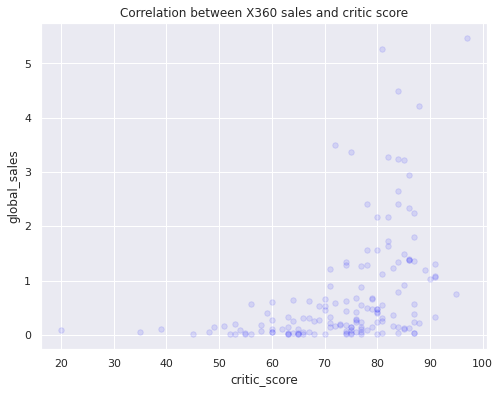

In [94]:
#scatterplot: correlation between critic score and games sold on X360 platform
values =["XOne"]
link = sales[sales['platform'].isin(values)]
link. plot.scatter(y='global_sales', x='critic_score', alpha=0.1, c='blue',s=30)
plt.title('Correlation between X360 sales and critic score')
plt.show()

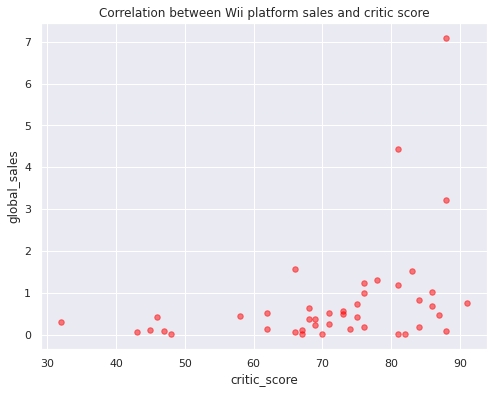

In [95]:
#scatterplot: correlation between critic score and games sold on WiiU platform
values =["WiiU"]
link = sales[sales['platform'].isin(values)]
link. plot.scatter(y='global_sales', x='critic_score', alpha=0.5, c='red',s=30)
plt.title('Correlation between Wii platform sales and critic score')
plt.show()

In [96]:
# building a correlation chart to find the pairwise correlation of all columns in the Dataframe 
cor_table = df[['critic_score', 'user_score', 'release_year', 'global_sales']].corr()
cor_table

,critic_score,user_score,release_year,global_sales
critic_score,1.000000,0.579538,0.011289,0.245347
user_score,0.579538,1.000000,-0.266021,0.088112
release_year,0.011289,-0.266021,1.000000,-0.075859
global_sales,0.245347,0.088112,-0.075859,1.000000


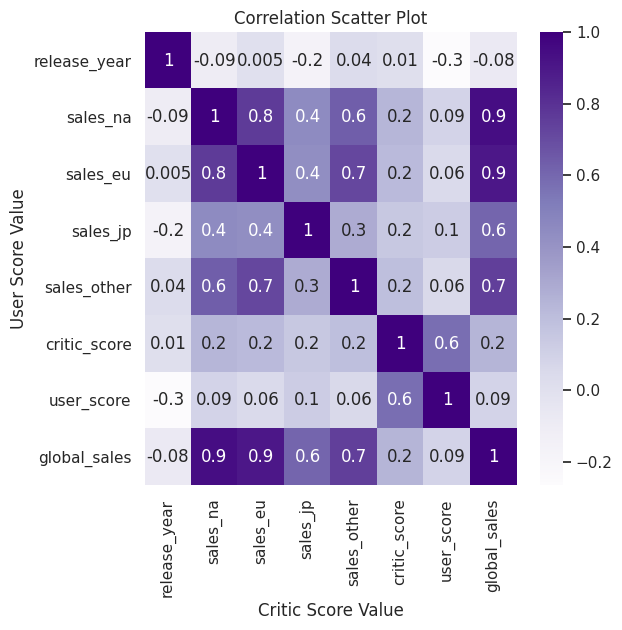

In [97]:
#visualizing correlation table
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Purples", fmt='.1g')
plt.title("Correlation Scatter Plot");
plt.xlabel('Critic Score Value')
plt.ylabel('User Score Value')
plt.show()

<div class="alert alert-info"> <b> User_Score and Critic_Score Relationship:</b>
    
**User_Score**
    
We constructed scatter plots to uncover the relationship between user scores and sales for our selected prominent platforms.

For the WiiU and XOne platforms, it appears that higher or lower user scores do not significantly impact sales. However, on the PS4 platform, there is a slight positive correlation between user scores and sales, implying that better user scores could lead to improved sales.

**Critic_Score**
    
Similar to the user score analysis, we used scatter plots to examine the connection between critic scores and sales on the leading platforms. On the PS4 and XOne platforms, we identified a discernible influence of critic scores on sales. While there is a positive correlation between sales and critic scores for these platforms, the strength of this correlation remains moderate.
In contrast, the scatterplot for the WiiU platform indicates a weak correlation between sales and user scores, suggesting that critic scores might not be a major factor influencing sales on this platform.

Overall, our observations suggest that neither user scores nor critic scores exert a substantial impact on the sales performance of these platforms.

**Correlation Analysis:**
We generated a correlation table to explore relationships among key parameters. The table reveals weak positive linear connections between both critic and user scores with global sales. Notably, there exists a moderate positive correlation of 0.6 between the two scores themselves.

Surprisingly, the release year of games shows minimal to no correlation, or even an inverse correlation, with critic and user scores.

Expanding the analysis to regional and global sales, the visualized heatmap confirms a correlation among sales figures. Furthermore, the release year demonstrates a minor inverse correlation with regional and global sales, potentially indicating that older games tend to achieve lower sales.
</div>

### same games sales comparison, games distribution by genre, profitable genres

In [98]:
#comparing sales of the same games on different platform
games = sales.query('platform == ("X360", "PS3", "WiiU", "XOne","Wii", "PS4") and global_sales>=0.9')
games = games[['name', 'platform', 'global_sales','genre', 'release_year', 'critic_score']]
games.head(2)

,name,platform,global_sales,genre,release_year,critic_score
31,Call of Duty: Black Ops 3,PS4,14.63,Shooter,2015,NaN
42,Grand Theft Auto V,PS4,12.62,Action,2014,97.0


In [99]:
games[['name', 'global_sales']].sort_values('global_sales', ascending=False).head(20)

,name,global_sales
31,Call of Duty: Black Ops 3,14.63
42,Grand Theft Auto V,12.62
77,FIFA 16,8.58
87,Star Wars Battlefront (2015),7.98
92,Call of Duty: Advanced Warfare,7.66
94,FIFA 17,7.60
99,Call of Duty: Black Ops 3,7.39
105,Fallout 4,7.17
110,Mario Kart 8,7.09
143,FIFA 15,6.08


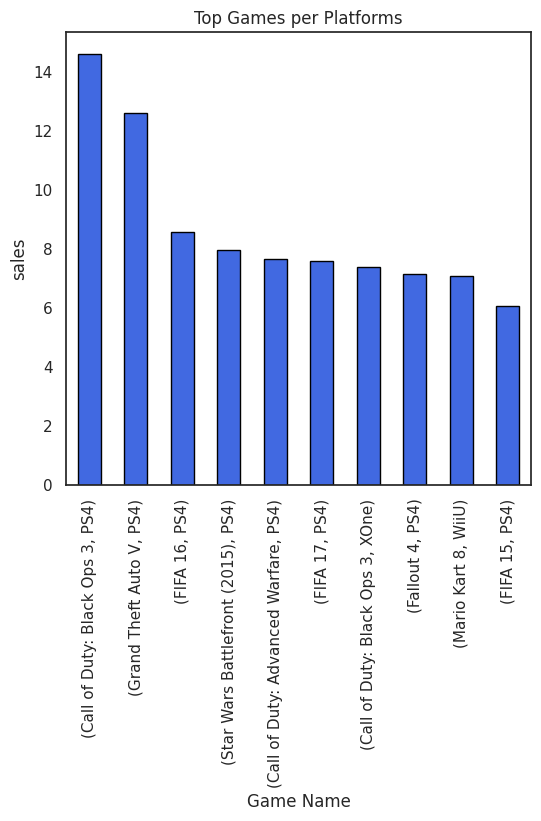

In [100]:
#building histogram for top games on average (mean value)
games_10 = games.nlargest(10,['global_sales'])
games_10.groupby(['name', 'platform'])['global_sales'].mean().sort_values(ascending=False).plot(kind='bar',color='royalblue', edgecolor='black')
plt.title('Top Games per Platforms')
plt.xlabel('Game Name')
plt.xticks(rotation=90)
plt.ylabel('sales');

In [101]:
#Top game Call of Duty: Black Ops 3 comparative info
call_of_duty = games[(games['name']=='Call of Duty: Black Ops 3')][['name', 'platform','global_sales','release_year','critic_score', 'genre']]
call_of_duty

,name,platform,global_sales,release_year,critic_score,genre
31,Call of Duty: Black Ops 3,PS4,14.63,2015,NaN,Shooter
99,Call of Duty: Black Ops 3,XOne,7.39,2015,NaN,Shooter
1049,Call of Duty: Black Ops 3,X360,1.70,2015,NaN,Shooter
1062,Call of Duty: Black Ops 3,PS3,1.69,2015,NaN,Shooter


In [102]:
# Top game FIFA 16 game comparative info
fifa= games[(games['name']=='FIFA 16')][['name','platform','global_sales','release_year','critic_score', 'genre']]
fifa    

,name,platform,global_sales,release_year,critic_score,genre
77,FIFA 16,PS4,8.58,2015,82.0,Sports
417,FIFA 16,XOne,3.25,2015,84.0,Sports
552,FIFA 16,PS3,2.70,2015,NaN,Sports
1182,FIFA 16,X360,1.57,2015,NaN,Sports


In [103]:
#Top game Fallout 4 comparative info
destiny= games[(games['name']=='Destiny')][['name','platform','global_sales','release_year','critic_score', 'genre']]
destiny

,name,platform,global_sales,release_year,critic_score,genre
154,Destiny,PS4,5.64,2014,76.0,Shooter
398,Destiny,XOne,3.37,2014,75.0,Shooter
898,Destiny,X360,1.92,2014,NaN,Shooter
1141,Destiny,PS3,1.61,2014,NaN,Shooter


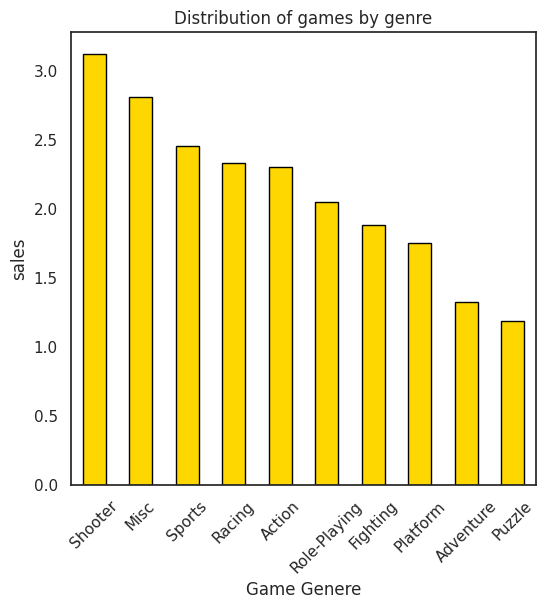

In [104]:
#building histogram for games distribution per genre on average (mean value is taken)
games.groupby('genre')['global_sales'].mean().sort_values(ascending=False).plot(kind='bar',color='gold', edgecolor='black')
plt.title('Distribution of games by genre')
plt.xlabel('Game Genere')
plt.xticks(rotation=45)
plt.ylabel('sales');


<div class="alert alert-info"> <b> Conclusions: Comparison of the same games</b>
    
We focused on the most prominent platforms with global sales exceeding 0.9 million USD to delve into the top-selling games across these platforms. Pivot tables were constructed to showcase the ten highest-performing games on average for platforms such as PS3, X360, PS4, and PS2, based on their global sales.

Subsequent analysis of the histogram highlighted the preeminence of the PS4 platform in the online gaming sector. We conducted a comparison of the same games' sales on multiple platforms to identify the most lucrative choices.

One standout example is the game "Call of Duty: Ops 3," released in 2015 across PS4, PS3, and X360 platforms, with the highest sales attributed to the PS4 platform. Similarly, "FIFA 16," also released in 2015 on these platforms, witnessed its greatest profit on the PS4 platform. Additionally, the final game among the most popular titles, released a year earlier across PS4, X360, and PS3, recorded its highest profit on the PS4 platform.

All these games belong to the highly popular genres of Shooter and Sports. It's reasonable to deduce that these genres were remarkably profitable and appealing to users. They garnered favorable critical scores and exhibited substantial global sales, contributing significantly to the revenue of the leading platforms.

As we look ahead, especially considering the ongoing advancements in gaming technologies, these genres and game categories are expected to maintain their appeal to the target audience. Consequently, channeling investments into the promotion of these types of games within the digital market seems like a prudent strategy for these platforms.herefore, investments, into this class games promotion on the digital market, look as a right move for these platforms.
</div>    

## User Profile 

### Top platforms Review

In [105]:
#defining function to plot the pie for top platforms share ("X360", "WiiU", "XOne", "PS4","Wii")
top_five_plt = sales.query('platform == ("WiiU","X360","PS3","Wii","3DS", "XOne", "PS4")')

def profile(index, values): 
    print('Top 5 {}s in the {}:'.format(index, values))  
    print(top_five_plt.pivot_table(index = index, values = values, aggfunc = 'sum').sort_values(
        values , ascending = False).plot(kind='pie', autopct='%1.1f%%', subplots=True))
    plt.title('Pie Chart visualization: Platforms Sales Share')

Top 5 platforms in the sales_na:
[<AxesSubplot:ylabel='sales_na'>]


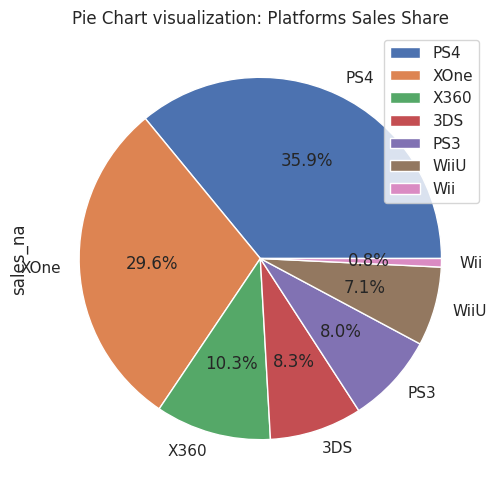

In [106]:
#visualization of North America Sales per platforms
profile('platform', 'sales_na')


Top 5 platforms in the sales_eu:
[<AxesSubplot:ylabel='sales_eu'>]


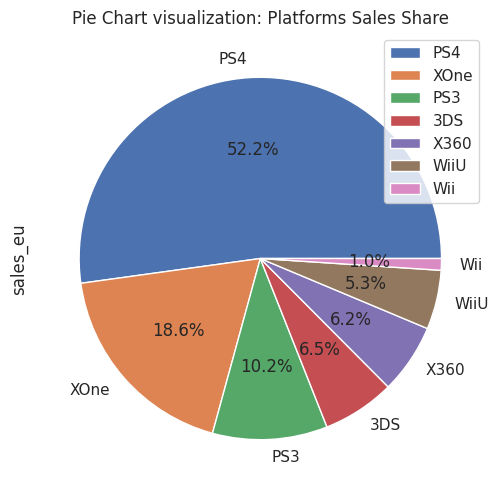

In [107]:
#visualization of Europian Sales per platforms
profile('platform', 'sales_eu')

Top 5 platforms in the sales_jp:
[<AxesSubplot:ylabel='sales_jp'>]


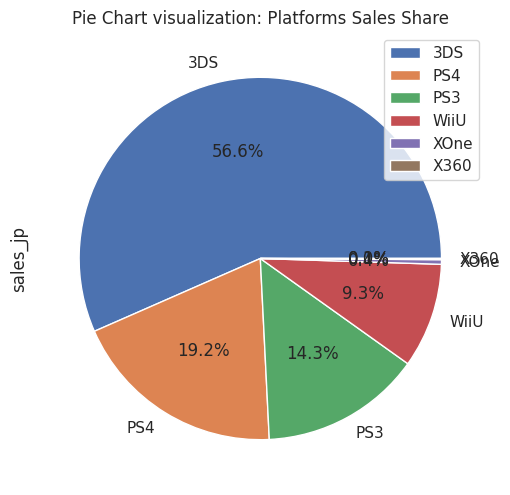

In [108]:
#visualization of Sales in Japan per platforms
profile('platform', 'sales_jp')


Top 5 platforms in the global_sales:
[<AxesSubplot:ylabel='global_sales'>]


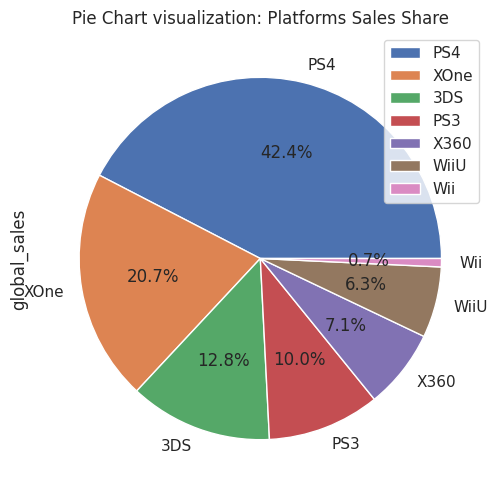

In [109]:
#visualization of worlwide sales shares
profile('platform', 'global_sales')

### Top Genres review

In [110]:
#defining function to plot the pie for popular geners
top_games = sales.query('genre == ("Action", "Sports", "Shooter", "Misc", "Role-Playing")')

def prof(index, values): 
    print('Top 5 {}s in the {}:'.format(index, values))
    explode=(0.1, 0, 0, 0, 0)
    print(top_games.pivot_table(index = index, values = values, aggfunc = 'sum').sort_values(
        values , ascending = False).plot(kind='pie', explode=explode, autopct='%1.1f%%', subplots=True))
    plt.title('Pie Chart visualization: Genres popularity Share')

Top 5 genres in the sales_na:
[<AxesSubplot:ylabel='sales_na'>]


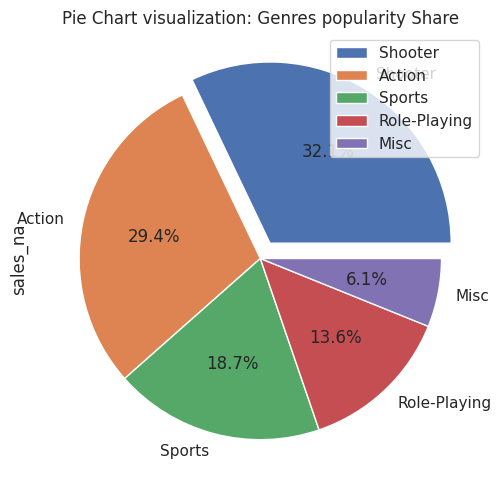

In [111]:
#visualization Geners Share in North America
prof('genre', 'sales_na')

Top 5 genres in the sales_eu:
[<AxesSubplot:ylabel='sales_eu'>]


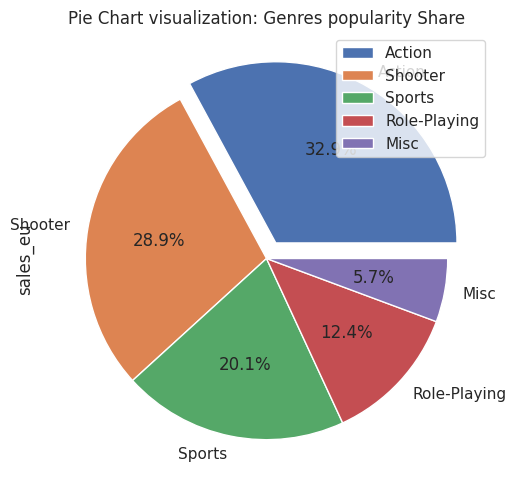

In [112]:
#visualization Geners Share in Europe
prof('genre', 'sales_eu')

Top 5 genres in the sales_jp:
[<AxesSubplot:ylabel='sales_jp'>]


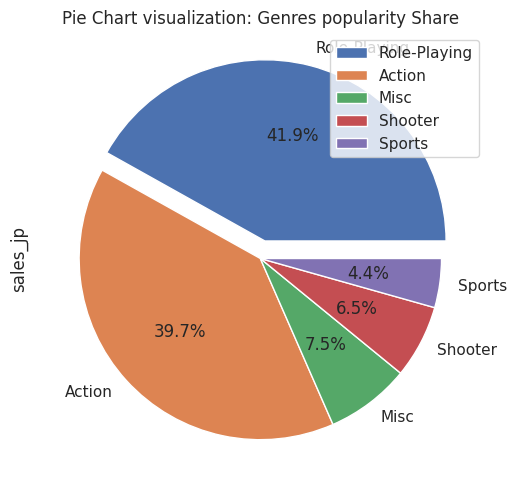

In [113]:
#visualization Geners Share in Japan
prof('genre', 'sales_jp')

Top 5 genres in the global_sales:
[<AxesSubplot:ylabel='global_sales'>]


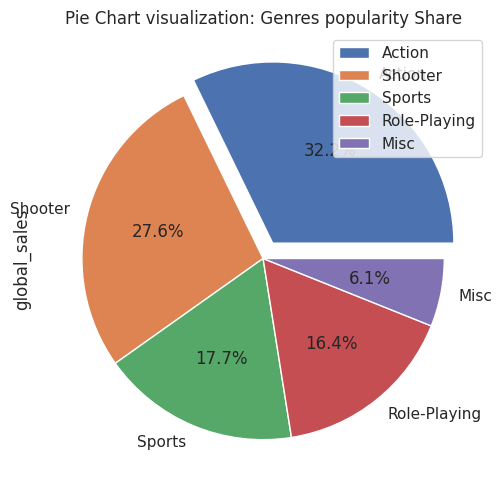

In [114]:
#visualization of Geners Share globaly
prof('genre', 'global_sales')

### ESRB ratings 

Rating (ESRB) Breakdown:
- Rating Pending (RP)
- Everyone (E)
- Everyone 10+ (E10+)
- Teen (T)
- Mature 17+ (M)
- Adults Only 18+ (AO)

In [115]:
#Northen America Sales per Rating
rating_na = sales.pivot_table(index='rating', values='sales_na', aggfunc='sum').reset_index().sort_values(
    by='sales_na', ascending=True)
rating_na

,rating,sales_na
1,E10+,33.23
3,T,39.06
0,E,50.74
4,undefined,64.72
2,M,96.42


In [116]:
#Europe Sales per Rating
rating_eu = sales.pivot_table(index='rating', values='sales_eu', aggfunc='sum').reset_index().sort_values(
    by='sales_eu', ascending=True)
rating_eu

,rating,sales_eu
1,E10+,26.16
3,T,34.12
0,E,58.06
4,undefined,58.95
2,M,93.44


In [117]:
#Sales in Japan per Rating
rating_jp = sales.pivot_table(index='rating', values='sales_jp', aggfunc='sum').reset_index().sort_values(
    by='sales_jp', ascending=True)
rating_jp

,rating,sales_jp
1,E10+,4.46
2,M,8.01
0,E,8.94
3,T,14.85
4,undefined,56.90


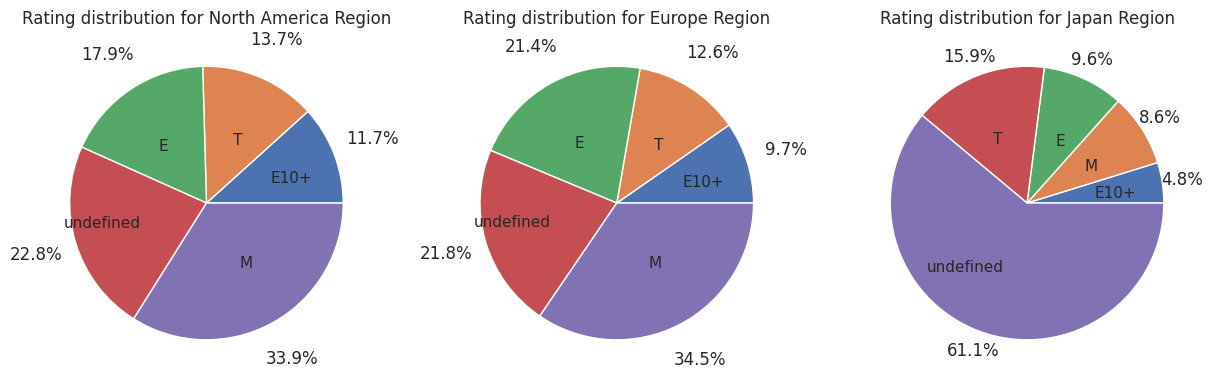

In [118]:
#Pie plot visualizing sales distribution in differen region per rating
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15, 15)) 

labels = rating_na['rating']
values = rating_na['sales_na']
ax1.pie(values, labels = labels, autopct = '%1.1f%%', pctdistance=1.3, labeldistance=.5)
ax1.set_title('Rating distribution for North America Region')

labels = rating_eu['rating']
values = rating_eu ['sales_eu']
ax2.pie(values, labels = labels, autopct = '%1.1f%%', pctdistance=1.3, labeldistance=.5)
ax2.set_title('Rating distribution for Europe Region')

labels = rating_jp['rating']
values = rating_jp['sales_jp']
ax3.pie(values, labels = labels, autopct = '%1.1f%%', pctdistance=1.15, labeldistance=.5)
ax3.set_title('Rating distribution for Japan Region')

fig.show()


<div class="alert alert-info"> <b> Conclusion: User profile regionally</b>
    
Conclusion: Regional User Profiles

The sales distribution across regions, as depicted by the Leading Platforms pie charts, distinctly highlights PS4's commanding presence in the North American (NA) and European Union (EU) markets. In the EU market, PS4 captures a significant 52.2% share, while in the Japanese (JP) market, it secures the second spot with a 19.2% share. The top spot in the JP market belongs to 3DS, boasting a dominant 56.6% share.

On a global scale, PS4 emerges as a rapidly growing product, with an impressive 110 million units already sold worldwide. Notably, its major enhancements encompass refined graphics, an upgraded operating system, improved internet connectivity, and user access to video and music services. In essence, technological advancements correlate positively with demand, consequently elevating sales shares. PS4 unmistakably emerges as the champion, claiming over 70% of the platform's sales.

Exploring Popular Genres through the pie plots reveals intriguing preferences. North American players favor Shooter games (32%), closely trailed by Action (29.4%), with the remainder divided between Sports and Role-Playing genres. Across the EU, Action takes the lead (32.9%), followed by Shooter (28.9%), with Sports and Role-Playing genres sharing the remaining interest. The Japanese player landscape differentiates significantly from NA and EU. Role-Playing genre emerges as the most favored (42%), followed by Action, while the rest is evenly distributed among Shooter, Misc, and Sports genres.

The substantial divergence between average users in North America and Japan implies the need for distinct business strategies. Customized gaming experiences and services tailored to user profiles could effectively boost platform profits.

Regarding ESRB Ratings, NA and EU markets exhibit a semblance in their preference for games rated M (Mature +17) in NA, accounting for 34.5%, while in JP, over 61% is attributed to an undefined category due to the distinct rating system in this region.

Considering the dataset's initial missing information, the derived shares suggest that a correctly identified "unidentified" category would likely yield a consistent pattern across all regions, where the highest-selling games encompass ratings M, T, and M.
</div>    

## HYPOTHESES
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

### Average user ratings of the Xbox One and PC platforms are the same:

- H0 hypothesis: Average user score of the Xbox One and PC platforms are the same (The null hypothesis is that all the means are equal in the population)
- H1 hypothesis: Average user score of the Xbox One and PC platforms differ (The means of two statistical populations are not equal)

In [119]:
#Selecting relevant period recommended earlier, dropping rows with NaN in column user score
updated_data = sales[sales.release_year > 2014]

In [120]:
updated_data = updated_data.dropna(subset=['user_score'], axis=0)

In [121]:
updated_data['user_score'].isna().sum()    

0

In [122]:
updated_data['user_score'].describe()

count    559.000000
mean       6.649016
std        1.623769
min        0.200000
25%        5.900000
50%        7.000000
75%        7.900000
max        9.300000
Name: user_score, dtype: float64

In [123]:
#preparing dataset for XOne platform
xone = updated_data.query('platform == "XOne"')
xone.head()

,name,platform,release_year,genre,sales_na,sales_eu,sales_jp,sales_other,critic_score,user_score,rating,global_sales
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25
571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65


In [124]:
#preparing dataset for PC platform
pc = updated_data.query('platform == "PC"')
pc.head()

,name,platform,release_year,genre,sales_na,sales_eu,sales_jp,sales_other,critic_score,user_score,rating,global_sales
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2851,The Witcher 3: Wild Hunt,PC,2015,Role-Playing,0.21,0.46,0.0,0.05,93.0,9.3,M,0.72
3123,Farming Simulator 17,PC,2016,Simulation,0.03,0.58,0.0,0.04,64.0,8.0,E,0.65
3771,Overwatch,PC,2016,Shooter,0.25,0.24,0.0,0.04,91.0,6.8,T,0.53


In [125]:
#calculating mean of user score by platform XOne 
xone.groupby(['platform'])['user_score'].mean()

platform
XOne    6.542149
Name: user_score, dtype: float64

In [126]:
#calculating mean of user score by platform PC
pc.groupby(['platform'])['user_score'].mean()

platform
PC    6.296429
Name: user_score, dtype: float64

In [127]:
#taking Xone data sample
xone_sample = xone['user_score']
xone_sample.head(2)


242    6.4
270    6.2
Name: user_score, dtype: float64

In [128]:
#taking PC data sample
pc_sample = pc['user_score']
pc_sample.head(2)

1530    5.4
1730    7.9
Name: user_score, dtype: float64

In [129]:
#XOne variance
variance=np.var(xone_sample)
print('XOne population varience', variance)

XOne population varience 2.108223482002596


In [130]:
#PC variance
variance= np.var(pc_sample)
print('PC population varience', variance)

PC population varience 3.0739158163265308


In [131]:
#T-test, where two independent samples have identical mean values (expected)
st.ttest_ind(xone_sample, pc_sample)

Ttest_indResult(statistic=1.088070274037042, pvalue=0.2778542084733835)

In [132]:
#Levene's test assuming that two samples have equal variane (alpha =default is 0.05)

from scipy.stats import levene
a = xone_sample
b = pc_sample
stat, p = levene(a, b)
p

0.07122249094391404

In [133]:
#T-test for hypothesis Average user score of the Xbox One and PC platforms are the same
def t_test(xone_sample, pc_sample, alpha=0.05):
    p_value=st.ttest_ind(xone_sample, pc_sample).pvalue
    print(p_value)
    if p_value < alpha:
        print('We reject the null hypothesis, as mean value of XOne is not equal to mean value of PC')
    else:
        print("Fail to reject null hypothesis")
t_test(xone_sample, pc_sample, alpha=0.05)        

0.2778542084733835
Fail to reject null hypothesis


<div class="alert alert-info"> <b> Hypothesis: Average user score of the Xbox One and PC platforms are the same </b>
    
We embarked on a hypothesis test to determine if the average user scores of the Xbox One and PC platforms exhibit any significant difference.

Our Null Hypothesis is "The average user scores of the Xbox One and PC platforms are the same."

Alternative Hypothesis is "The average user scores of the Xbox One and PC platforms differ."

Setting an alpha level of 0.05, which corresponds to a confidence level of 0.95, we conducted an independent t-test. The data samples were taken from populations of Xbox One and PC users, each with 50 values. Initial inspection showed that the mean user score for Xbox One is 6.5, while for PC it is 6.2. Population variances were moderately distinct, with 2.1 for Xbox and 3.07 for PC. Notably, higher variance suggests a broader distribution of data from the mean.

The t-test returned a p-value of 0.27, indicating that we **failed to reject the null hypothesis**. Our analysis suggests that the average user scores of the Xbox One and PC platforms are not significantly different. However, we acknowledge certain limitations due to the dataset's obsolete and missing information. It's plausible that more current data would potentially alter our findings.

Though our conclusion currently indicates similarity in average user scores, we speculate that if the dataset was more up-to-date, the disparities between PC and both platforms might have emerged as more pronounced. 
</div>    

### Average user ratings for the Action and Sports genres differ:

- H0 hypothesis: Average user score for Action and Sports genres are the same (The means of two statistical populations are equal)
- H1 hypothesis:Average user score for Action and Sports genres differ (The means of two statistical populations are not equal)

In [134]:
updated_data['genre'].describe()

count        559
unique        12
top       Action
freq         193
Name: genre, dtype: object

In [135]:
#preparing dataset for Action platform
action = updated_data.query('genre == "Action"')
action.head()

,name,platform,release_year,genre,sales_na,sales_eu,sales_jp,sales_other,critic_score,user_score,rating,global_sales
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
305,Batman: Arkham Knight,PS4,2015,Action,1.53,1.69,0.10,0.64,87.0,7.6,M,3.96
390,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,93.0,8.2,M,3.42
396,Assassin's Creed Syndicate,PS4,2015,Action,0.81,1.99,0.07,0.52,76.0,6.8,M,3.39
623,Bloodborne,PS4,2015,Action,1.03,0.81,0.26,0.38,92.0,8.6,M,2.48


In [136]:
#preparing dataset for Action platform
sports = updated_data.query('genre == "Sports"')
sports.head()

,name,platform,release_year,genre,sales_na,sales_eu,sales_jp,sales_other,critic_score,user_score,rating,global_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25
420,Madden NFL 16,PS4,2015,Sports,2.34,0.30,0.00,0.60,83.0,5.9,E,3.24


In [137]:
#calculating mean of user score by genre Action
action.groupby(['genre'])['user_score'].mean()

genre
Action    6.80829
Name: user_score, dtype: float64

In [138]:
#calculating mean of user score by genre Sports
sports.groupby(['genre'])['user_score'].mean()

genre
Sports    5.19878
Name: user_score, dtype: float64

In [139]:
#taking Action data sample
action_sample = action['user_score']
action_sample.head(2)

231    8.1
305    7.6
Name: user_score, dtype: float64

In [140]:
#taking Sports data sample
sports_sample = sports['user_score']
sports_sample.head(2)

77    4.3
94    5.0
Name: user_score, dtype: float64

In [141]:
#Action genre variance
variance=np.var(action_sample)
print('Action genre population varience', variance)

Action genre population varience 1.8036618432709604


In [142]:
#Sports genre variance
variance=np.var(sports_sample)
print('Sports genre population varience', variance)

Sports genre population varience 3.8252424152290296


In [143]:
#T-test, where two independent samples have identical mean values (expected)
st.ttest_ind(sports_sample, action_sample, equal_var=False)

Ttest_indResult(statistic=-6.764121363817531, pvalue=5.97163549920592e-10)

In [144]:
#Levene's test assuming that two samples have equal variance (alpha =default is 0.05)

from scipy.stats import levene
a = action_sample
b = sports_sample
stat, p = levene(a, b)
p

1.060035862066395e-05

In [145]:
#T-test for hypothesis: Average user score of genres Sports and Action are different
sample1 = action_sample
sample2 = sports_sample
alpha = 0.05  

results = st.ttest_ind(sample1, sample2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis ")
else:
    print("We can't reject the null hypothesis") 


p-value:  1.0012846807938657e-13
We reject the null hypothesis 


<div class="alert alert-info"> <b> Hypothesis: Average user score for Action and Sports genres </b>

In this hypothesis test, we aimed to explore whether there is a statistically significant difference in the average user ratings between the Action and Sports genres.

Our Null Hypothesis is "The average user ratings for the Action and Sports genres are the same."

Alternative Hypothesis is "The average user ratings for the Action and Sports genres differ."

We established an alpha level of 0.05 to make our decision criterion. This signifies our confidence level of 95% in the analysis.

Conducting an independent t-test, we collected data samples from both the Action and Sports genres. Initial examination revealed a mean user score of 6.8 for the Action genre and 5.1 for the Sports genre. The mean values were relatively close, with the population variance differing substantially - 3.8 for Action genre and 1.8 for Sports genre. This indicates that the data for the Sports genre is more dispersed from its mean than the Action genre.

After conducting the t-test, we obtained a p-value of 0.01. This p-value indicates a statistically significant difference between the average user ratings for the Action and Sports genres. As a result, we **rejected the null hypothesis**, which implies that there is indeed a distinction in the average user ratings between the two genres.

In conclusion, our analysis demonstrated that the average user ratings for the Action and Sports genres are statistically different.
</div>

## Generlal Conclusion for the project "Online Games Sales"

<div class="alert alert-info"> <b>Generlal Conclusion: </b>  
    
Throughout this project, we embarked on an exploratory journey into the world of online games sales. Our primary objective was to unravel the dynamics of the gaming industry, uncover trends, and glean insights that could aid future investment decisions. We navigated through data preprocessing, exploratory data analysis, hypothesis testing, and visualization, each step revealing valuable facets of the gaming landscape.

**Data Preprocessing and Initial Insights:**

- We meticulously handled missing data, employing various techniques to impute and interpret the absence of information in different columns like 'Critic_Score', 'User_Score', 'Rating', and 'Year_of_Release'.
- The dataset revealed that some gaming platforms saw their prime for about 7 to 10 years before yielding to newer technologies or evolving preferences.

**Exploratory Data Analysis:**

- We charted the trajectories of game releases over the years, pinpointing a surge in production between 2000 and 2011, followed by a gradual decline.
- Lollipop graphs illuminated the emergence and waning of various gaming platforms, providing insights into the industry's evolution.
- By delving into the correlation between user scores, critic scores, and global sales, we concluded that while these scores held weak positive connections with sales, their mutual correlation was more pronounced.

**Hypothesis Testing:**

- Through hypothesis testing, we explored questions regarding user scores on different platforms and user ratings for different genres.
- We concluded that the average user scores of Xbox One and PC platforms are not significantly different, while the user ratings for Action and Sports genres exhibited notable distinctions.

**Visualization:**

- Our visualizations, including scatter plots, line plots, and box plots, highlighted trends and relationships within the data.
- Heatmaps provided a comprehensive view of correlations between variables, guiding our interpretations.

**User Profiles and Region-Specific Insights:**

- Examining user profiles across regions revealed platform preferences and genre popularity disparities among North American, European, and Japanese players.
- We observed that the PS4 platform dominated in North America and Europe, while the 3DS held sway in the Japanese market.
- ESRB ratings indicated that preferences for game ratings differed between regions.

**General Conclusion:**

In conclusion, this project offered an in-depth analysis of online games sales, shedding light on platforms, genres, user preferences, and regional disparities. Through data-driven insights, we discerned the ebb and flow of the gaming industry, identified potential investment avenues, and recognized the significance of evolving technologies and consumer demands. As the gaming landscape continues to evolve, this analysis serves as a foundation for strategic decision-making in a dynamic and ever-expanding market.

Our journey through this project reaffirms the notion that the gaming world is not only a source of entertainment but a realm of valuable data and insights, ripe for exploration and discovery.
</div>    